In [ ]:
!pip install torch
!pip install pandas
!pip install numpy
!pip install pathlib
!pip install sklearn
!pip install mathplotlib

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib
You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import DataLoader, SequentialSampler
import logging
import logging.handlers

In [ ]:
if torch.cuda.is_available():
  print("\nUsing: ", torch.cuda.get_device_name(0))
  device = torch.device('cuda')
else:
  print("\nUsing: CPU")
  device = torch.device('cpu')


Using:  GeForce GTX 1070


In [ ]:
def load_dataset (data_filename):
  data_path = Path(data_filename)
  if data_path.exists():
    print(f"Loading {data_path}...")
    data_csv = pd.read_csv(data_path)
    return data_csv
  else:
    print(f"The dataset in {data_path} does not exist")

In [ ]:
data = load_dataset("stock_price_sentiment_data.csv")
data['sentiment'].fillna(-1, inplace=True)
data.head(10)

Loading stock_price_sentiment_data.csv...


,Date,Open,High,Low,Close,Adj Close,Volume,Stock,headline,publisher,sentiment
0,2012-05-14,27.804007,28.211731,27.496424,27.825464,25.591705,5526574.0,A,"Groupon, Agilent: After-Hours Headlines",webmaster,2.0
1,2012-05-15,29.263233,29.735336,28.905579,28.977110,26.650898,9783064.0,A,Agilent Sees Improving Trends - Analyst Blog,Zacks,0.0
2,2012-05-16,29.091558,29.327612,28.397711,28.440628,26.157486,4976321.0,A,"Agilent Still A Name Worth Owning (A, DHR, WAT...",Investopedia,2.0
3,2012-05-17,29.971388,29.978540,28.340487,28.347639,26.071957,6900248.0,A,"Stocks to Watch: Wal-Mart, Sears (Update 1)",TheStreet.Com,2.0
4,2012-05-18,28.612303,28.776825,27.625179,27.703863,25.479870,7216057.0,A,NaN,NaN,-1.0
5,2012-05-21,27.775393,28.698139,27.753935,28.605150,26.308800,3890215.0,A,NaN,NaN,-1.0
6,2012-05-22,28.655222,29.470673,28.340487,28.962805,26.637741,6180139.0,A,Agilent Pays A Hefty Price For A Fixer-Upper D...,Investopedia,0.0
7,2012-05-23,28.633762,29.341917,28.175966,29.163090,26.821951,4817788.0,A,NaN,NaN,-1.0
8,2012-05-24,29.213161,29.434908,28.934193,29.341917,26.986423,3591182.0,A,NaN,NaN,-1.0
9,2012-05-25,29.341917,29.656652,29.177397,29.334764,26.979847,2633552.0,A,NaN,NaN,-1.0


In [ ]:
# get the stock list
stock_list = data['Stock'].unique()
print(f"The dataset consists of {len(stock_list)} stocks.\n{stock_list}")

The dataset consists of 4752 stocks.
['A' 'AA' 'AADR' ... 'ZTR' 'ZTS' 'ZUMZ']


In [ ]:
# split data
train_test_data = {}
for index, stock in enumerate(stock_list):
    train_test_data[stock] = {}
    try:
      train_test_data[stock]["train"], train_test_data[stock]["test"] = train_test_split(data.loc[(data['Stock'] == stock), ['Date', 'Close', 'sentiment', 'Stock', 'Volume']], test_size = 0.33, shuffle=False)
    except ValueError:
      print(data.loc[(data['Stock'] == stock), 
                     ['Date', 'Close', 'sentiment', 'Stock', 'Volume']])
      del train_test_data[stock]
    print(f"{stock}: {index + 1} / {len(stock_list)}")

A: 1 / 4752
AA: 2 / 4752
AADR: 3 / 4752
AAL: 4 / 4752
AAMC: 5 / 4752
AAME: 6 / 4752
AAOI: 7 / 4752
AAON: 8 / 4752
AAP: 9 / 4752
AAPL: 10 / 4752
AAU: 11 / 4752
AAWW: 12 / 4752
AAXJ: 13 / 4752
AB: 14 / 4752
ABAX: 15 / 4752
ABB: 16 / 4752
ABBV: 17 / 4752
ABC: 18 / 4752
ABCB: 19 / 4752
ABCD: 20 / 4752
ABCO: 21 / 4752
ABEV: 22 / 4752
ABG: 23 / 4752
ABIO: 24 / 4752
ABM: 25 / 4752
ABMD: 26 / 4752
ABR: 27 / 4752
ACAD: 28 / 4752
ACC: 29 / 4752
ACCO: 30 / 4752
ACE: 31 / 4752
ACET: 32 / 4752
ACFC: 33 / 4752
ACFN: 34 / 4752
ACGL: 35 / 4752
ACH: 36 / 4752
ACHC: 37 / 4752
ACIM: 38 / 4752
ACIW: 39 / 4752
ACLS: 40 / 4752
ACM: 41 / 4752
ACN: 42 / 4752
ACNB: 43 / 4752
ACOR: 44 / 4752
ACP: 45 / 4752
ACRE: 46 / 4752
ACRX: 47 / 4752
ACST: 48 / 4752
ACT: 49 / 4752
ACTA: 50 / 4752
ACTG: 51 / 4752
ACU: 52 / 4752
ACUR: 53 / 4752
ACWI: 54 / 4752
ACWV: 55 / 4752
ACWX: 56 / 4752
ACY: 57 / 4752
ADBE: 58 / 4752
ADC: 59 / 4752
ADES: 60 / 4752
ADI: 61 / 4752
ADM: 62 / 4752
ADMA: 63 / 4752
ADMP: 64 / 4752
ADMS: 65 / 4

In [ ]:
print(train_test_data['AT']["test"].tail(10))

              Date  Close  sentiment Stock    Volume
428477  2020-05-19   2.02        0.0    AT  842000.0
428478  2020-05-20   1.98       -1.0    AT  468100.0
428479  2020-05-21   2.06       -1.0    AT  353900.0
428480  2020-05-22   2.06       -1.0    AT  296300.0
428481  2020-05-26   2.11       -1.0    AT  357500.0
428482  2020-05-27   2.12       -1.0    AT  336000.0
428483  2020-05-28   2.10        0.0    AT  521700.0
428484  2020-05-29   2.10        0.0    AT  433500.0
428485  2020-06-01   2.08        2.0    AT  382500.0
428486  2020-06-02   2.11       -1.0    AT  595700.0


In [ ]:
# calculate return, drop stocks with too little data and drop rows with nan values
for index, stock in enumerate(stock_list):
  try:
    print(f"{stock} : {index} / {len(stock_list)}")
    if len(train_test_data[stock]["train"]) < 10:
      del train_test_data[stock]
    else:
      train_test_data[stock]["train"]['PrevClose'] = train_test_data[stock]["train"]['Close'].shift(1)
      train_test_data[stock]["test"]['PrevClose'] = train_test_data[stock]["test"]['Close'].shift(1)
      train_test_data[stock]["train"]['Return'] = (train_test_data[stock]["train"]['Close']
                                                   - train_test_data[stock]["train"]['PrevClose']) / train_test_data[stock]["train"]['PrevClose'] *100
      train_test_data[stock]["test"]['Return'] = (train_test_data[stock]["test"]['Close']
                                                  - train_test_data[stock]["test"]['PrevClose']) / train_test_data[stock]["test"]['PrevClose'] * 100
      train_test_data[stock]["train"].dropna(how='any', inplace=True)
      train_test_data[stock]["test"].dropna(how='any', inplace=True)
  except KeyError:
    print(f"Some Error at stock {stock}")

A : 0 / 4752
AA : 1 / 4752
AADR : 2 / 4752
AAL : 3 / 4752
AAMC : 4 / 4752
AAME : 5 / 4752
AAOI : 6 / 4752
AAON : 7 / 4752
AAP : 8 / 4752
AAPL : 9 / 4752
AAU : 10 / 4752
AAWW : 11 / 4752
AAXJ : 12 / 4752
AB : 13 / 4752
ABAX : 14 / 4752
ABB : 15 / 4752
ABBV : 16 / 4752
ABC : 17 / 4752
ABCB : 18 / 4752
ABCD : 19 / 4752
ABCO : 20 / 4752
ABEV : 21 / 4752
ABG : 22 / 4752
ABIO : 23 / 4752
ABM : 24 / 4752
ABMD : 25 / 4752
ABR : 26 / 4752
ACAD : 27 / 4752
ACC : 28 / 4752
ACCO : 29 / 4752
ACE : 30 / 4752
ACET : 31 / 4752
ACFC : 32 / 4752
ACFN : 33 / 4752
ACGL : 34 / 4752
ACH : 35 / 4752
ACHC : 36 / 4752
ACIM : 37 / 4752
ACIW : 38 / 4752
ACLS : 39 / 4752
ACM : 40 / 4752
ACN : 41 / 4752
ACNB : 42 / 4752
ACOR : 43 / 4752
ACP : 44 / 4752
ACRE : 45 / 4752
ACRX : 46 / 4752
ACST : 47 / 4752
ACT : 48 / 4752
ACTA : 49 / 4752
ACTG : 50 / 4752
ACU : 51 / 4752
ACUR : 52 / 4752
ACWI : 53 / 4752
ACWV : 54 / 4752
ACWX : 55 / 4752
ACY : 56 / 4752
ADBE : 57 / 4752
ADC : 58 / 4752
ADES : 59 / 4752
ADI : 60 / 4752

In [ ]:
# get the updated stock list
stock_list = list(train_test_data.keys())
print(f"The dataset consists of {len(stock_list)} stocks.\n{stock_list}")

The dataset consists of 4638 stocks.
['A', 'AA', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAOI', 'AAON', 'AAP', 'AAU', 'AAWW', 'AAXJ', 'AB', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABEV', 'ABG', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ACAD', 'ACC', 'ACCO', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACGL', 'ACH', 'ACHC', 'ACIM', 'ACIW', 'ACLS', 'ACM', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACRE', 'ACRX', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACY', 'ADBE', 'ADC', 'ADES', 'ADI', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AED', 'AEE', 'AEG', 'AEGN', 'AEH', 'AEHR', 'AEIS', 'AEL', 'AEO', 'AER', 'AERI', 'AES', 'AET', 'AEY', 'AEZS', 'AFAM', 'AFB', 'AFC', 'AFCB', 'AFG', 'AFK', 'AFL', 'AFMD', 'AFSI', 'AFT', 'AG', 'AGA', 'AGCO', 'AGD', 'AGEN', 'AGF', 'AGG', 'AGIO', 'AGM', 'AGNC', 'AGND', 'AGO', 'AGOL', 'AGQ', 'AGRO', 'AGRX', 'AGTC', 'AGX', 'AGYS', 'AGZ', 'AGZD', 'AHC', 'AHGP', 'AHH', 'A

          Date      Close  sentiment Stock     Volume  PrevClose    Return
1   2012-05-15  28.977110        0.0     A  9783064.0  27.825464  4.138819
2   2012-05-16  28.440628        2.0     A  4976321.0  28.977110 -1.851399
3   2012-05-17  28.347639        2.0     A  6900248.0  28.440628 -0.326958
4   2012-05-18  27.703863       -1.0     A  7216057.0  28.347639 -2.271004
5   2012-05-21  28.605150       -1.0     A  3890215.0  27.703863  3.253290
6   2012-05-22  28.962805        0.0     A  6180139.0  28.605150  1.250315
7   2012-05-23  29.163090       -1.0     A  4817788.0  28.962805  0.691525
8   2012-05-24  29.341917       -1.0     A  3591182.0  29.163090  0.613197
9   2012-05-25  29.334764       -1.0     A  2633552.0  29.341917 -0.024377
10  2012-05-29  30.171675       -1.0     A  5696570.0  29.334764  2.852964


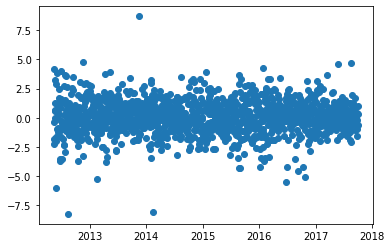

In [ ]:
# plot histogram
print(train_test_data['A']["train"].head(10))
dates = matplotlib.dates.date2num(train_test_data['A']['train']['Date'])
plt.plot_date(dates, train_test_data['A']["train"]['Return'])


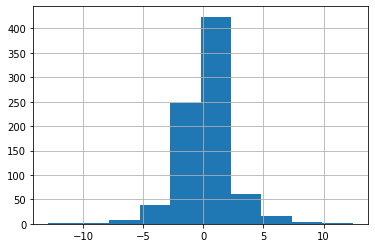

In [ ]:
train_test_data['AT']["test"]['Return'].hist()
plt.show()

In [ ]:
# reformat dataset for using series of length T to predict the return
seq_len = 10
train_data = {}
test_data = {}
for index, stock in enumerate(stock_list):
  train_data[stock] = {}
  test_data[stock] = {}
  X_train = []
  Y_train = []
  X_test = []
  Y_test = []
  for time in range(len(train_test_data[stock]["train"]) - seq_len):
    if train_test_data[stock]["train"]['Return'].iloc[time + seq_len] != 0:
      x_train = train_test_data[stock]["train"].iloc[time:time + seq_len].drop(['Date', 'Stock', 'PrevClose', 'Close'], axis=1)
      X_train.append(x_train)
      y_train = train_test_data[stock]["train"]['Return'].iloc[time + seq_len]
      Y_train.append(y_train)
  for time in range(len(train_test_data[stock]["test"]) - seq_len):
    if train_test_data[stock]["test"]['Return'].iloc[time + seq_len] != 0:
      x_test = train_test_data[stock]["test"].iloc[time:time + seq_len].drop(['Date', 'Stock', 'PrevClose', 'Close'], axis=1)
      X_test.append(x_test)
      y_test = train_test_data[stock]["test"]['Return'].iloc[time + seq_len]
      Y_test.append(y_test)

  X_train = np.array(list(map(lambda x: x.to_numpy(), X_train)))
  X_train = X_train.reshape((-1, seq_len, 3))
  Y_train = np.array(Y_train)

  X_test = np.array(list(map(lambda x: x.to_numpy(), X_test)))
  X_test = X_test.reshape((-1, seq_len, 3))
  Y_test = np.array(Y_test)
  
  train_data[stock]['input'] = X_train
  train_data[stock]['label'] = Y_train

  test_data[stock]['input'] = X_test
  test_data[stock]['label'] = Y_test

  print(f"{stock}: {index + 1} / {len(stock_list)}")

A: 1 / 4638
AA: 2 / 4638
AADR: 3 / 4638
AAL: 4 / 4638
AAMC: 5 / 4638
AAME: 6 / 4638
AAOI: 7 / 4638
AAON: 8 / 4638
AAP: 9 / 4638
AAU: 10 / 4638
AAWW: 11 / 4638
AAXJ: 12 / 4638
AB: 13 / 4638
ABAX: 14 / 4638
ABB: 15 / 4638
ABBV: 16 / 4638
ABC: 17 / 4638
ABCB: 18 / 4638
ABCD: 19 / 4638
ABCO: 20 / 4638
ABEV: 21 / 4638
ABG: 22 / 4638
ABIO: 23 / 4638
ABM: 24 / 4638
ABMD: 25 / 4638
ABR: 26 / 4638
ACAD: 27 / 4638
ACC: 28 / 4638
ACCO: 29 / 4638
ACE: 30 / 4638
ACET: 31 / 4638
ACFC: 32 / 4638
ACFN: 33 / 4638
ACGL: 34 / 4638
ACH: 35 / 4638
ACHC: 36 / 4638
ACIM: 37 / 4638
ACIW: 38 / 4638
ACLS: 39 / 4638
ACM: 40 / 4638
ACN: 41 / 4638
ACNB: 42 / 4638
ACOR: 43 / 4638
ACP: 44 / 4638
ACRE: 45 / 4638
ACRX: 46 / 4638
ACST: 47 / 4638
ACT: 48 / 4638
ACTA: 49 / 4638
ACTG: 50 / 4638
ACU: 51 / 4638
ACUR: 52 / 4638
ACWI: 53 / 4638
ACWV: 54 / 4638
ACWX: 55 / 4638
ACY: 56 / 4638
ADBE: 57 / 4638
ADC: 58 / 4638
ADES: 59 / 4638
ADI: 60 / 4638
ADM: 61 / 4638
ADMA: 62 / 4638
ADMP: 63 / 4638
ADMS: 64 / 4638
ADP: 65 / 46

In [ ]:
logger = logging.getLogger('LSTM - Performance')
logger.setLevel(logging.DEBUG)
logger.propagate = False
def train(hidden_dim, num_layers, num_epochs, learning_rate, batch_size, log=True):
  filepath = 'models/lstm_hidden_dim{}_layers{}_epochs{}_lr{}_batch{}.log'.format(hidden_dim, num_layers, num_epochs, learning_rate, batch_size)
  if not Path(filepath).exists():
    
    fh = logging.FileHandler(filepath)
    logger.addHandler(fh)

    input_dim = 3
    output_dim = 1
    class LSTM(nn.Module):
        def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
            super(LSTM, self).__init__()
            self.hidden_dim = hidden_dim
            self.num_layers = num_layers
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, output_dim)
        def forward(self, x):
            h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, dtype=torch.float32).requires_grad_().cuda()
            c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim, dtype=torch.float32).requires_grad_().cuda()
            out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
            out = self.fc(out[:, -1, :])
            return out


    model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
    model = model.to(device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


    avg_train_loss = 0
    avg_test_loss = 0
    num_batches_train = 0
    num_batches_test = 0
    for stock in stock_list:
      print(stock)
      for epoch in range(num_epochs):
        #Training
        input = torch.from_numpy(train_data[stock]['input']).type(torch.cuda.FloatTensor)
        labels = torch.from_numpy(train_data[stock]['label']).type(torch.cuda.FloatTensor)
        i_batch = 0
        for i in range(0, len(input), batch_size):
          if len(labels) > 0:
            i_batch += 1
            model.train()
            model.zero_grad()
            out = model(input[i : i + batch_size])
            train_loss = criterion(out, labels[i : i + batch_size].unsqueeze(-1))
            avg_train_loss += train_loss.item()

            #backpropagation
            train_loss.backward()
            #update parameters
            optimizer.step()
            if log is True:
              logger.info("\n###################################################\nTraining === Epoch: {}/{} Loss: {} Stock: {} Batch: {}\n###################################################\n".format(epoch+1, num_epochs, train_loss.item(), stock, i_batch))
              logger.info(f"Output:{out.squeeze(-1)}\nLabels:{labels[i : i + batch_size]}")
            #print("\n###################################################\nTraining === Epoch: {}/{} Loss: {} Stock: {} Batch: {}\n###################################################\n".format(epoch+1, num_epochs, train_loss.item(), stock, i_batch))
        num_batches_train += i_batch    
  
      #Testing
      input = torch.from_numpy(test_data[stock]['input']).type(torch.cuda.FloatTensor)
      labels = torch.from_numpy(test_data[stock]['label']).type(torch.cuda.FloatTensor)
      i_batch = 0
      for i in range(0, len(input), batch_size):
        if len(labels) > 0:
          i_batch += 1
          model.eval()
          with torch.no_grad():
            out = model(input[i : i + batch_size])
            test_loss = criterion(out, labels[i : i + batch_size].unsqueeze(-1))
            avg_test_loss += test_loss.item()
            if log is True:
              logger.info("\n###################################################\nTesting === Epoch: {}/{} Loss: {} Stock: {} Batch: {}\n###################################################\n".format(epoch+1, num_epochs, test_loss.item(), stock, i_batch))
              logger.info(f"Output:{out.squeeze(-1)}\nLabels:{labels[i : i + batch_size]}")
          #print('\n###################################################\nTesting === Epoch: {}/{} Loss: {} Stock: {} Batch: {}\n###################################################\n'.format(epoch+1, num_epochs, test_loss.item(), stock, i_batch))
      num_batches_test += i_batch
    avg_train_loss = avg_train_loss / num_batches_train
    avg_test_loss = avg_test_loss / num_batches_test
    print(f"Average training loss: {avg_train_loss} Average test loss: {avg_test_loss} Number of Train Iterations: {num_batches_train} Number of Test Iterations: {num_batches_test}")
    logger.info(f"Average training loss: {avg_train_loss} Average test loss: {avg_test_loss}")
    fh.close()
    logger.handlers.clear()
    logging.root.removeHandler(fh)

In [ ]:
hidden_dims = [2, 4, 6, 8, 16, 32, 64, 128, 256, 512, 1024]
num_layers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
num_epochs = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
learning_rates = [0.1, 0.2, 0.4, 0.001, 0.002, 0.004, 0.0001, 0.00001]
batch_sizes = [8, 16, 32, 64, 128, 256, 512]


for dim in hidden_dims:
  for layer in num_layers:
    for epoch in num_epochs:
      for lr in learning_rates:
        for batch in batch_sizes:
          train(hidden_dim=dim, num_layers=layer, num_epochs=epoch, learning_rate=lr, batch_size=batch, log=True)


Streaming output truncated to the last 5000 lines.
BIP
BIS
BIT
BIV
BIZD
BJK
BJZ
BK
BKCC
BKE
BKEP
BKEPP
BKF
BKH
BKK
BKN
BKSC
BKT
BKU
BLCM
BLDP
BLDR
BLE
BLH
BLIN
BLJ
BLK
BLKB
BLL
BLRX
BLUE
BLV
BLW
BLX
BMA
BME
BMI
BMO
BMRC
BMRN
BMS
BMTC
BND
BNFT
BNJ
BNS
BNSO
BNY
BOCH
BOH
BOIL
BOKF
BOM
BOOT
BOS
BOSC
BOTJ
BPFH
BPK
BPOP
BPOPM
BPOPN
BPT
BPTH
BQH
BR
BRAQ
BRC
BRF
BRFS
BRG
BRID
BRKL
BRKR
BRKS
BRO
BRP
BRT
BRX
BRZU
BSAC
BSBR
BSCF
BSCG
BSCH
BSCJ
BSCK
BSCL
BSCM
BSCO
BSD
BSE
BSET
BSF
BSI
BSJK
BSJL
BSJM
BSL
BSMX
BSPM
BSQR
BSRR
BST
BSX
BTA
BTG
BTI
BTN
BTT
BTU
BUD
BUI
BUNL
BUNT
BURL
BUSE
BV
BVN
BWA
BWEN
BWFG
BWG
BWP
BWV
BWX
BWZ
BX
BXC
BXMX
BXP
BXS
BYBK
BYD
BYFC
BYLD
BZH
BZM
BZQ
CA
CAAS
CAB
CAC
CACH
CACI
CAE
CAF
CAFE
CAG
CAJ
CAKE
CALA
CALD
CALI
CALL
CALM
CALX
CAMP
CAMT
CANF
CAPE
CAPL
CAR
CARA
CARV
CARZ
CASH
CASI
CASS
CASY
CATM
CATO
CATY
CBA
CBAY
CBB
CBFV
CBLI
CBMG
CBND
CBNK
CBON
CBPO
CBSH
CBT
CBZ
CCBG
CCC
CCF
CCI
CCIH
CCJ
CCK
CCL
CCLP
CCM
CCMP
CCNE
CCO
CCOI
CCRN
CCS
CCU
CCUR
CCX
CCXE
CCXI
CDC
CDNA
CDNS
C

In [ ]:
logging.shutdown()